In [1]:
import os
import pandas as pd

In [2]:
from numpy.random import normal

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
os.chdir(os.path.join(os.getcwd(),'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.transit import *
from ExMAS.utils import inData as inData

In [5]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json')  # load the 
inData.params = params


params.nP = 100
params.simTime = 0.2
params.speeds.ride = 8
params.mode_choice_beta = -0.5
params.speeds.walk = 1.2
params.walk_discomfort = 2
params.delay_value = 1.5
params.walk_threshold = 600
params.shared_discount = 0.3
params.s2s_discount = 0.6

In [6]:
import json
from ExMAS.utils import *

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [8]:
params.shared_discount = 0.3
inData = ExMAS.utils.generate_demand(inData, params)
#inData = ExMAS.main(inData, params, plot=False)
#ExMAS.utils.make_traveller_ride_matrix(inData)

In [9]:
def read_lists(df):
    for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
        df[col] = df[col].apply(lambda x: json.loads(x))
    return df 

In [32]:
transitized_rm

,ride,exp_u_private,exp_u_d2d,sum_exp,u,u_sh,origin,destination,dist,VoT,orig_walk_time,delay,dest_walk_time,s2s_ttrav,u_s2s,exp_u_s2s,prob_s2s,efficient,pax_id
30,207,0.045389,0.060927,0.209106,6.184980,5.596156,630748795,44757287,3399,0.002562,263.0,32.0,259.0,396,4.550137,0.102790,0.491569,True,30
38,207,0.048976,0.051246,0.192051,6.032851,5.942239,44857685,44759522,3130,0.003422,120.0,32.0,232.0,396,4.775662,0.091829,0.478148,True,38
44,208,0.040444,0.043521,0.166441,6.415666,6.269026,44856852,44763561,3249,0.003798,146.0,2.0,235.0,379,4.990501,0.082476,0.495526,True,44
38,208,0.048976,0.050175,0.189661,6.032851,5.984496,44857685,44759522,3130,0.003422,193.0,1.0,250.0,379,4.804575,0.090511,0.477223,True,38
16,215,0.042185,0.044888,0.179669,6.331395,6.207179,44838049,3377240340,3163,0.004017,291.0,25.0,0.0,341,4.758999,0.092597,0.515374,True,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,431,0.064335,0.065614,0.287381,5.487294,5.447925,503608204,4349049085,2848,0.003414,150.0,9.0,0.0,377,3.697530,0.157431,0.547814,True,9
15,431,0.046173,0.053841,0.197742,6.150735,5.843429,4552156190,44817942,3199,0.003389,133.0,22.0,225.0,377,4.651143,0.097728,0.494219,True,15
30,433,0.045389,0.052076,0.198738,6.184980,5.910120,630748795,44757287,3399,0.002562,103.0,114.0,259.0,405,4.579862,0.101273,0.509583,True,30
44,433,0.040444,0.041552,0.143557,6.415666,6.361613,44856852,44763561,3249,0.003798,146.0,58.0,246.0,405,5.575460,0.061561,0.428825,True,44


In [44]:
transitized_rides[transitized_rides.efficient==True]

,indexes,origin,destination,treq,ttrav,df,efficient,transitizable,dist
207,"[30, 38]",4.486108e+07,4.475569e+07,623.0,396.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3148.0
208,"[44, 38]",6.307488e+08,4.476804e+07,673.0,379.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3067.0
215,"[16, 28]",1.413911e+09,3.377240e+09,534.0,341.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2815.0
216,"[16, 15]",6.729834e+08,4.349049e+09,426.0,373.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2992.0
218,"[9, 15]",4.552156e+09,4.349049e+09,423.0,370.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2927.0
220,"[121, 124]",1.448536e+09,4.482646e+07,1341.0,460.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,3720.0
221,"[124, 121]",1.448536e+09,4.482646e+07,1341.0,460.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,3720.0
222,"[155, 169]",1.448536e+09,1.508491e+09,1765.0,441.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,3558.0
237,"[95, 93]",4.475952e+07,4.484407e+07,1123.0,328.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2608.0
317,"[9, 16]",6.729834e+08,4.300759e+09,426.0,358.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2940.0


In [65]:
[transitized_rides.loc[ride.indexes_orig].origin.to_list() + transitized_rides.loc[ride.indexes_dest].destination.to_list()]

[630748798.0,
 1448535795.0,
 1448535764.0,
 44759522.0,
 44768043.0,
 1571092393.0,
 44826459.0,
 44844067.0]

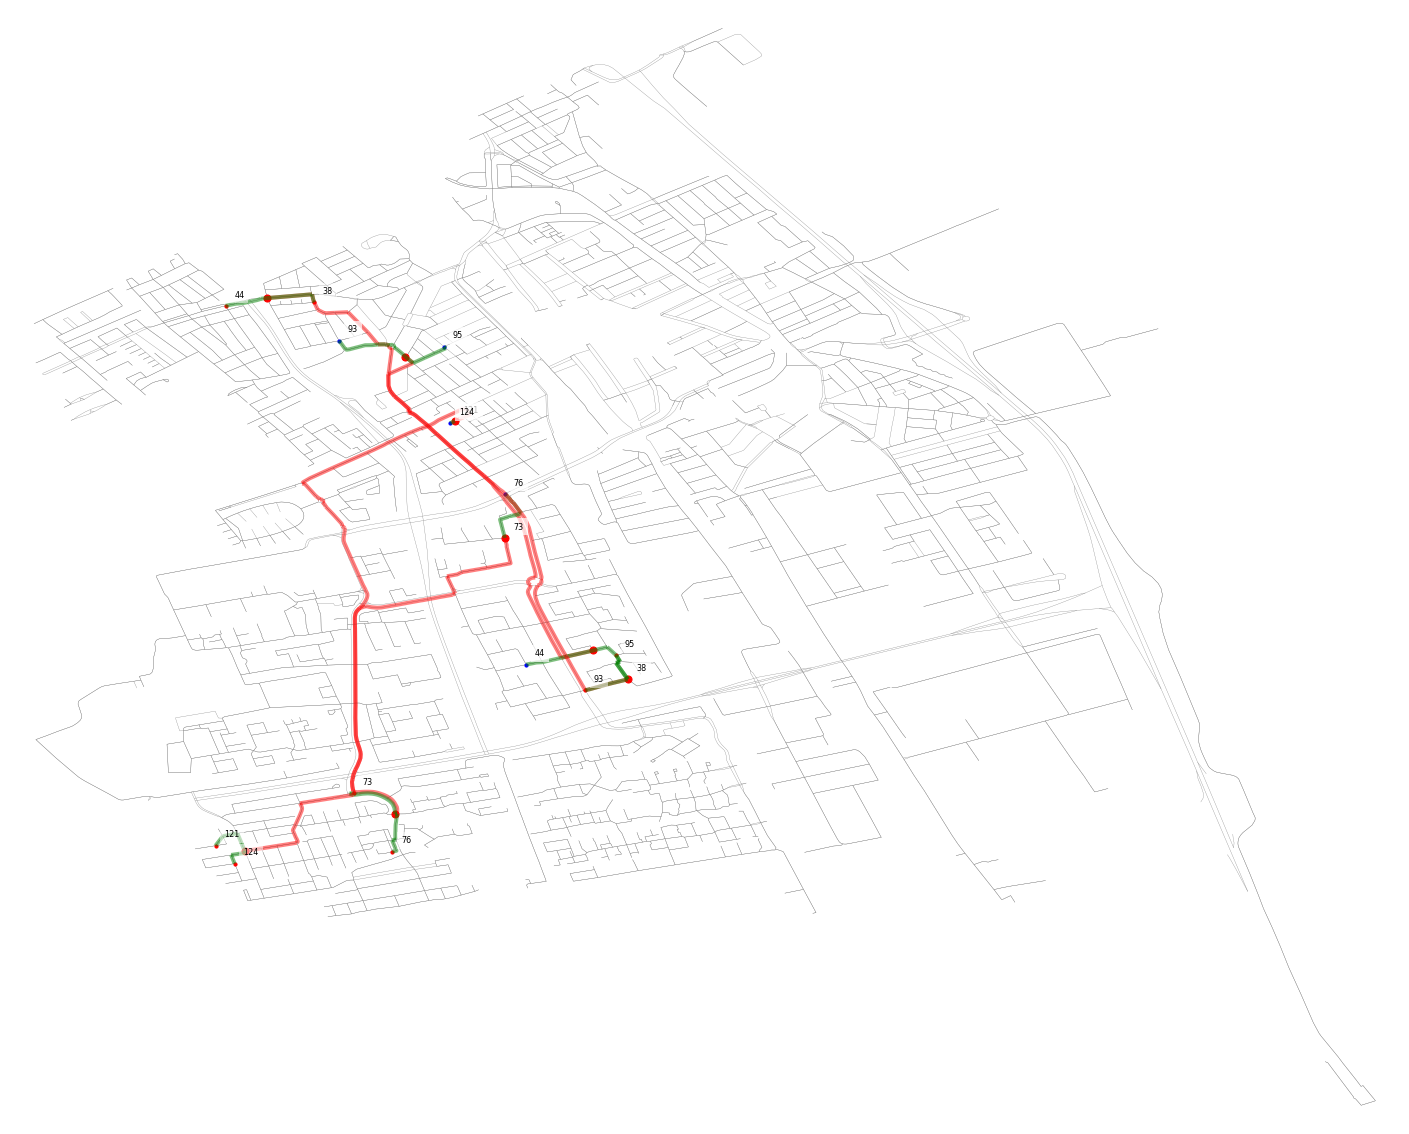

In [62]:
fig, ax = None, None
for indeks in [208, 429, 220, 237]:
    tr = transitized_rides.loc[indeks]
    transitized_rm[transitized_rm.ride == tr.name].origin.to_list()
    tr['origins'] = transitized_rm[transitized_rm.ride == tr.name].origin.to_list()
    tr['destinations'] = transitized_rm[transitized_rm.ride == tr.name].destination.to_list()
    fig, ax = plot_ride(inData,tr, fig = fig, ax = ax)

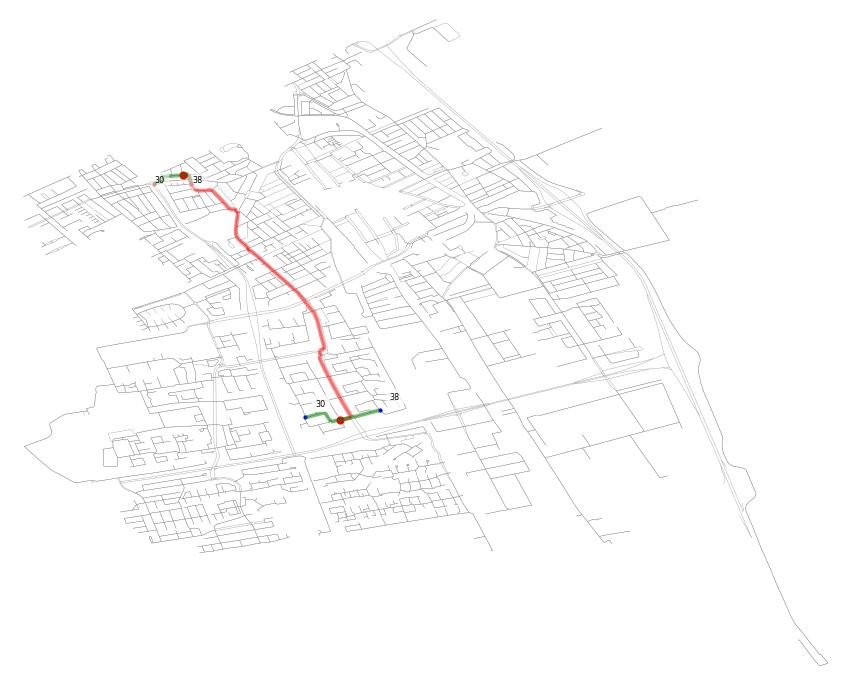

In [56]:
fig, ax = plot_ride(inData,tr)

In [ ]:
indeksy = [208, 429, 220, 237]

In [48]:
transitized_rides = pd.read_csv('ExMAS/data/transits/vis/transitized_rides.csv', index_col = 0)
for col in ['indexes']:
        transitized_rides[col] = transitized_rides[col].apply(lambda x: json.loads(x))
transitized_rm = pd.read_csv('ExMAS/data/transits/vis/transitized_rm.csv', index_col = 0)
second_level_rides = read_lists(pd.read_csv('ExMAS/data/transits/vis/second_level_rides.csv', index_col = 0))

In [17]:
ride = second_level_rides.iloc[-1]
ride

indexes                        [44, 38, 76, 73, 124, 121, 95, 93]
u_pax                                                   19.615456
u_veh                                                        1310
kind                                                           40
u_paxes         [5.510382352941177, 4.637676470588236, 5.19526...
times                    [552.0, 493, 93, 286, 37, 162, 119, 120]
indexes_orig                                 [208, 429, 221, 237]
indexes_dest                                 [208, 429, 221, 237]
degree                                                        NaN
index                                                         318
origins                                                       NaN
destinations                                                  NaN
deps                                                          NaN
dep_deltas                                                    NaN
treqs                                                         NaN
delays    

In [10]:
inData.sblts.requests = pd.read_csv('ExMAS/data/transits/vis/requests.csv', index_col = 0)
inData.sblts.rides = pd.read_csv('ExMAS/data/transits/vis/first_level_rides.csv', index_col = 0)
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    inData.sblts.rides[col] = inData.sblts.rides[col].apply(lambda x: json.loads(x))
inData.sblts.rides = inData.sblts.rides.apply(pd.to_numeric, errors='ignore')

In [12]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,origins,destinations,deps,dep_deltas,treqs,delays,ttravs
0,[0],11.879246,728,1,[11.879246408795426],"[0, 728]",[0],[0],1,0,[1435362531],[1668136728],[0],[0.0],[0],[0],[728]
1,[1],6.178733,401,1,[6.178732648262328],"[5, 401]",[1],[1],1,1,[1448535742],[1391417166],[5],[0.0],[5],[0],[401]
2,[2],3.683071,235,1,[3.683071375436255],"[35, 235]",[2],[2],1,2,[1391417418],[44813589],[35],[0.0],[35],[0],[235]
3,[3],6.276251,447,1,[6.276250814344735],"[41, 447]",[3],[3],1,3,[44724090],[385474972],[41],[0.0],[41],[0],[447]
4,[4],6.646736,427,1,[6.646736105017495],"[45, 427]",[4],[4],1,4,[1608998214],[599022490],[45],[0.0],[45],[0],[427]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,"[16, 9, 15]",17.484171,488,30,"[6.192816159108688, 5.447925336050128, 5.84342...","[84.0, 35, 16, 369, 35, 33]","[16, 9, 15]","[16, 9, 15]",3,431,"[44838049, 503608204, 4552156190]","[3377240340, 4349049085, 44817942]","[84.0, 119.0, 135.0]","[18.0, -33.0, 15.0]",[127 76 124],[-43. 43. 11.],"[420, 453, 437]"
432,"[134, 142, 143]",20.299114,813,31,"[10.778295240021706, 5.49829126803606, 4.02252...","[1138.0, 46, 102, 285, 22, 358]","[134, 142, 143]","[143, 142, 134]",3,432,"[2527832781, 1460714944, 1435362515]","[4217813223, 1569646491, 44721735]","[1138.0, 1184.0, 1286.0]","[-69.33333333333326, 24.666666666666742, 44.66...",[1114 1208 1228],[ 24. -24. 58.],"[813, 767, 665]"
433,"[30, 44, 38]",18.079418,523,30,"[5.910120436364004, 6.361613285989439, 5.80768...","[302.5, 14, 50, 355, 31, 73]","[30, 44, 38]","[44, 30, 38]",3,433,"[630748795, 44856852, 44857685]","[44763561, 44757287, 44759522]","[302.5, 316.5, 366.5]","[-69.33333333333331, 59.666666666666686, 9.666...",[245 374 324],[ 57.5 -57.5 42.5],"[450, 436, 459]"
434,"[113, 111, 118]",30.074837,975,31,"[11.04268202381439, 9.798932946276164, 9.23322...","[926.0, 47, 31, 619, 156, 122]","[113, 111, 118]","[118, 111, 113]",3,434,"[44796081, 44809060, 44815353]","[1570984994, 643586570, 44769961]","[926.0, 973.0, 1004.0]","[-7.0, -18.0, 25.0]",[955 944 987],[-29. 29. 17.],"[975, 928, 897]"


In [72]:
inData.sblts.requests = pd.read_csv('ExMAS/data/transits/vis/second_level_requests.csv', index_col = 0)
inData.sblts.rides = pd.read_csv('ExMAS/data/transits/vis/second_level_rides.csv', index_col = 0)
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    inData.sblts.rides[col] = inData.sblts.rides[col].apply(lambda x: json.loads(x))

In [89]:
ride = inData.sblts.rides.iloc[-1]
ride

level_0                                                       318
indexes                        [44, 38, 76, 73, 124, 121, 95, 93]
u_pax                                                   19.615456
u_veh                                                        1310
kind                                                           40
u_paxes         [5.510382352941177, 4.637676470588236, 5.19526...
times                    [552.0, 493, 93, 286, 37, 162, 119, 120]
indexes_orig                                 [208, 429, 221, 237]
indexes_dest                                 [208, 429, 221, 237]
degree                                                        NaN
index                                                         318
origins                                                       NaN
destinations                                                  NaN
deps                                                          NaN
dep_deltas                                                    NaN
treqs     

[208, 429, 221, 237]


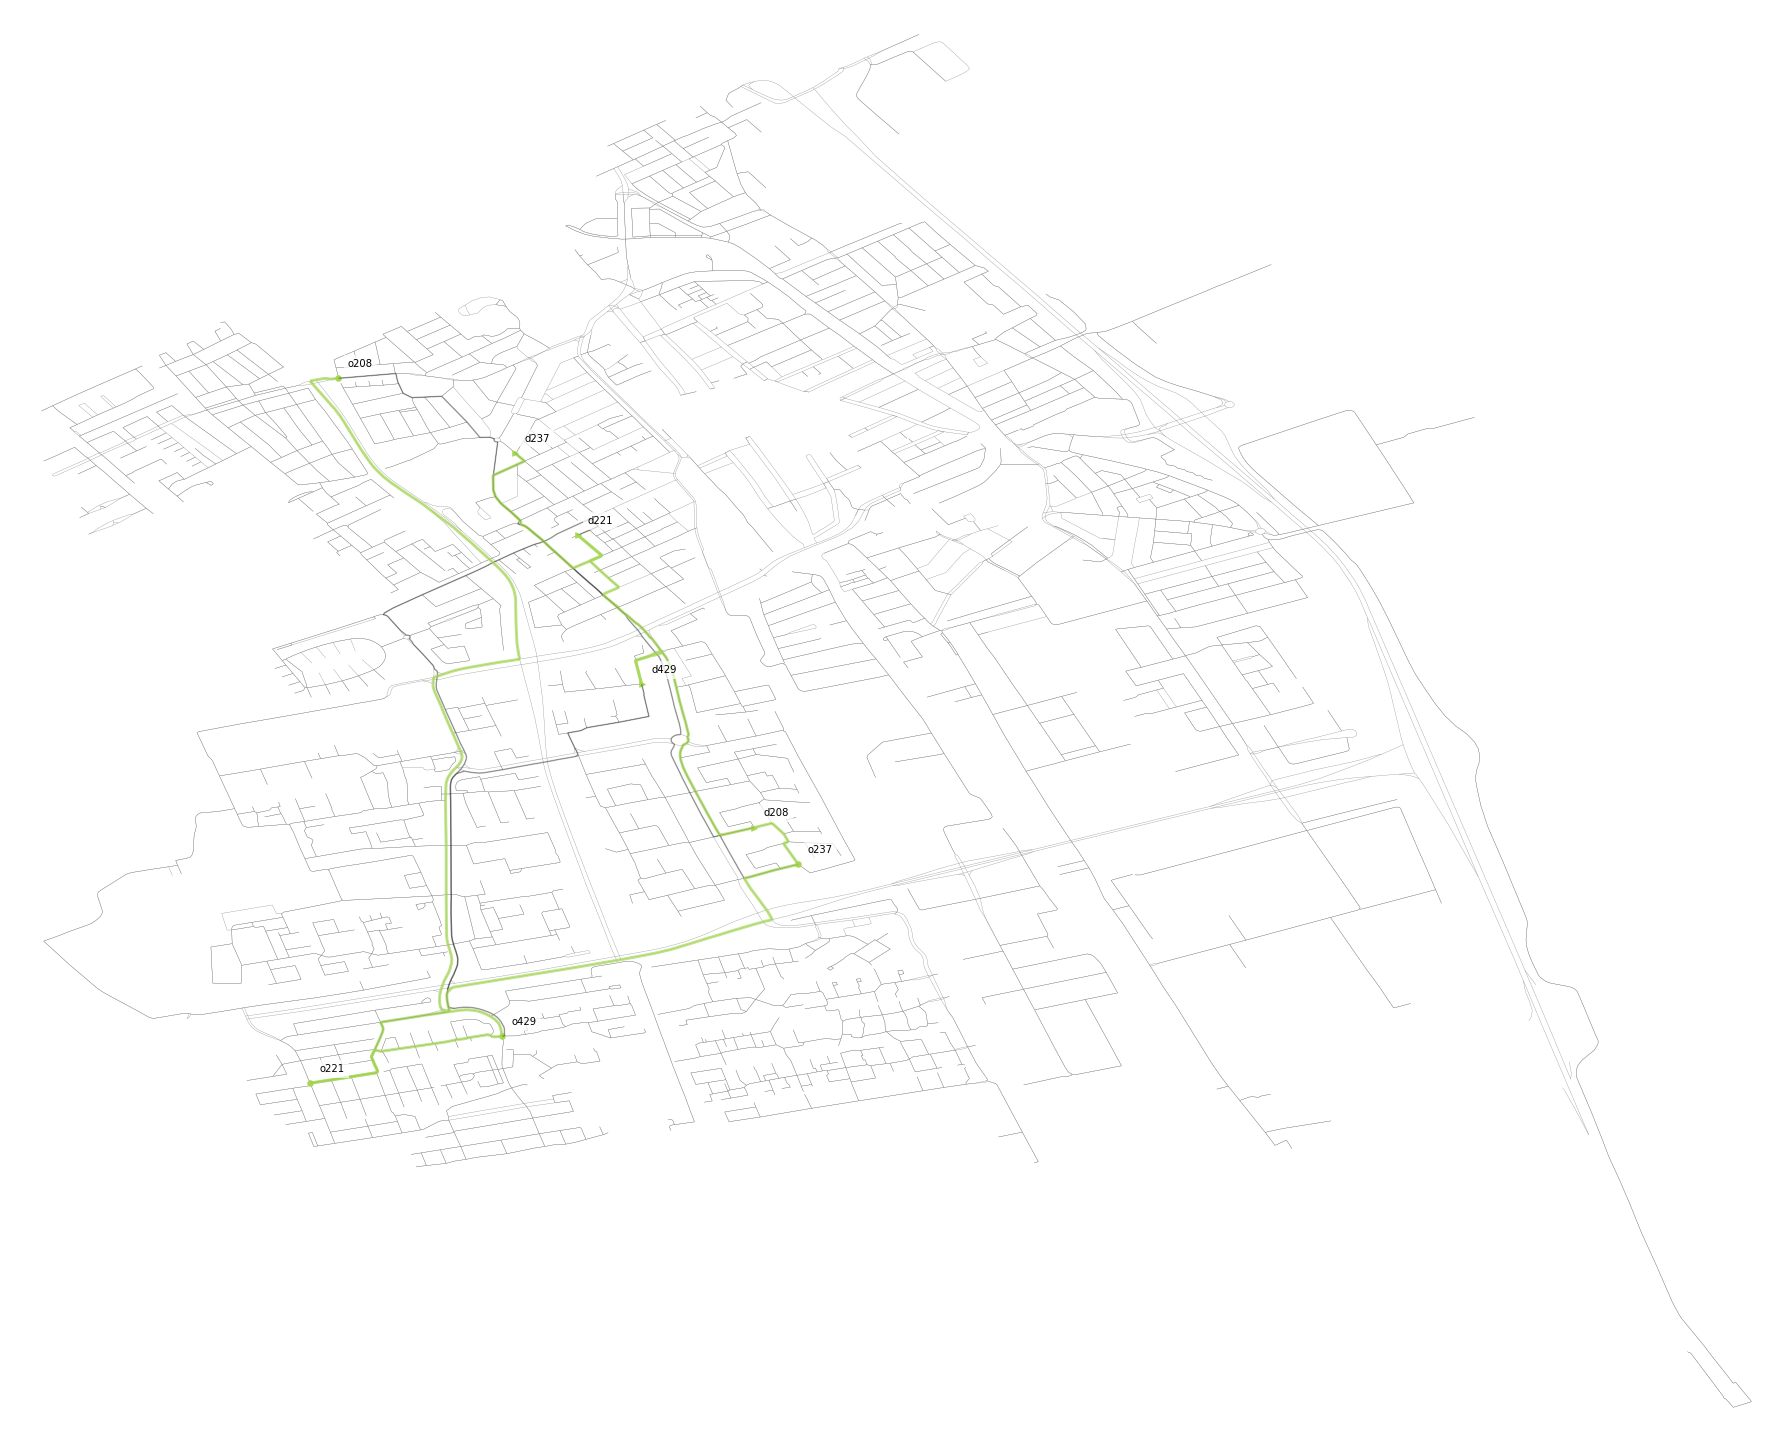

In [91]:
plot_map_rides(inData,[ride.name], light = False)

In [ ]:
requests = pd.read_csv('ExMAS/data/transits/vis/requests.csv', index_col = 0)
requests = pd.read_csv('ExMAS/data/transits/300/requests.csv', index_col = 0)
r2 = pd.read_csv('ExMAS/data/transits/300/rides2.csv', index_col = 0)
del requests['index']
rm = pd.read_csv('ExMAS/data/transits/300/transit_rm.csv')
rm['pax_id'] = rm['Unnamed: 0']
del rm['Unnamed: 0']

In [170]:
transitizables = pd.read_csv('ExMAS/data/transits/tranisitizables.csv', index_col=0)
transitizables["low_level_indexes"] = transitizables["low_level_indexes"].apply(lambda x: json.loads(x))
transitizables

,origin,destination,treq,ttrav,df,efficient,transitizable,dist,indexes,indexes_set,unmergables,pax_id,low_level_indexes
102,643587012,4349049067,1059,338,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2704,"[43, 57]","{57, 43}",[],102,"[43, 57]"
121,1508490990,1668136725,869,461,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3688,"[33, 38]","{33, 38}",[],121,"[33, 38]"
127,44898446,4349049085,1089,347,ride exp_u_private exp_u_d2d ... exp_u...,True,True,2776,"[61, 62]","{61, 62}",[],127,"[61, 62]"
141,1413911066,1435362416,1204,452,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3616,"[75, 87]","{75, 87}",[],141,"[75, 87]"
152,44798698,1830058778,1190,486,ride exp_u_private exp_u_d2d ... exp_u...,True,True,3888,"[67, 84]","{67, 84}",[],152,"[67, 84]"


In [171]:
r2.sample(2)

,Unnamed: 0,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index
32,32,"[141, 127, 152]",16.96725,1688,30,"[6.5831, 3.9038500000000003, 6.4803]","[1037.0, 234, 455, 171, 215, 613]","[141, 127, 152]","[127, 141, 152]",NaN,32
7,7,"[121, 141]",13.09040,1714,20,"[6.18355, 6.90685]","[848.0, 392, 711, 596]","[121, 141]","[121, 141]",2.0,7


In [173]:
sum(transitizables.loc[[121, 102]].low_level_indexes.to_list(),[])

[33, 38, 43, 57]

In [177]:
r2['indexes'] = r2.apply(lambda x: sum(transitizables.loc[x.indexes].low_level_indexes.to_list(),[]), axis = 1)

((189, 18), (155, 18), (34, 11))

In [42]:
from ExMAS.main import matching

In [154]:
r1 = pd.read_csv('ExMAS/data/transits/rides1.csv')
r1.treqs = r1.treqs.apply(lambda x: x.replace("  "," "))
r1.treqs = r1.treqs.apply(lambda x: x.replace("[ ","["))
r1.treqs = r1.treqs.apply(lambda x: x.replace("[\n","["))
r1.treqs = r1.treqs.apply(lambda x: x.replace(" ",","))
r2 = pd.read_csv('ExMAS/data/transits/rides2.csv')
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times']:
    print(col)
    r2[col] = r2[col].apply(lambda x: json.loads(x))
transitizable = pd.read_csv('ExMAS/data/transits/tranisitizables.csv')
for col in ['indexes','indexes_dest','indexes_orig','u_paxes','times','origins','destinations','deps','dep_deltas', 'ttravs','treqs']:
    print(col)
    r1[col] = r1[col].apply(lambda x: json.loads(x))


indexes
indexes_dest
indexes_orig
u_paxes
times
indexes
indexes_dest
indexes_orig
u_paxes
times
origins
destinations
deps
dep_deltas
ttravs
treqs


In [203]:
import pprint
pprint.pprint(params)

{'PT_discount': DotMap(),
 'VoT': 0.0035,
 'WtS': 1.3,
 'avg_speed': 8,
 'city': 'Delft, Netherlands',
 'delay_value': 1.5,
 'demand_structure': {'destinations_dispertion': -0.001,
                      'origins_dispertion': -0.0003,
                      'temporal_dispertion': 0.3,
                      'temporal_distribution': 'uniform'},
 'dist_threshold': 100000,
 'fare': DotMap(),
 'horizon': 1200,
 'matching_obj': 'u_veh',
 'max_degree': 8,
 'mode_choice_beta': -0.5,
 'nP': 100,
 'paths': {'G': 'ExMAS/data/graphs/Delft.graphml',
           'albatross': 'ExMAS/data/albatross',
           'data': 'ExMAS/data',
           'main': 'ExMAS',
           'params': 'ExMAS/data/configs',
           'postcodes': 'ExMAS/data/postcodes/PC4_Nederland_2015.shp',
           'skim': 'ExMAS/data/graphs/Delft.csv'},
 'pax_delay': 15,
 'price': 1.5,
 'profitability': False,
 's2s_discount': 0.6,
 'shared_discount': 0.3,
 'simTime': 0.2,
 'speeds': DotMap(ride=8, walk=1.2),
 't0': Timestamp('2021-06-

In [192]:
inData.sblts.rides = pd.concat([r1,r2])
inData.sblts.rides.shape, r1.shape, r2.shape

((189, 18), (155, 18), (34, 11))

In [180]:
inData.sblts.rides = pd.concat([r1,r2])
inData = matching(inData, params, make_assertion = False)

07-06-21 16:13:41-INFO-Matching 100 trips to 189 rides in order to min u_veh
07-06-21 16:13:41-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,190 
reduced by matching to:               28,367


ValueError: 43 is not in list

In [25]:
r2

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index
0,[0],1.371750,372,1,[1.37175],"[735, 372]",[0],[0],1,0
1,[1],1.371750,372,1,[1.37175],"[735, 372]",[1],[1],1,1
2,[2],1.290625,350,1,[1.2906250000000001],"[856, 350]",[2],[2],1,2
3,[3],1.084125,294,1,[1.084125],"[1268, 294]",[3],[3],1,3
4,[4],1.062000,288,1,[1.062],"[1268, 288]",[4],[4],1,4


In [24]:
inData = ExMAS.utils.generate_demand(inData, params)
inData = ExMAS.main(inData, params, plot=False)

07-06-21 13:58:50-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-06-21 13:58:50-INFO-creating combinations
DotMap()
07-06-21 13:58:50-INFO-9900	 nR*(nR-1)
07-06-21 13:58:50-INFO-Reduction of feasible pairs by 98.94%
07-06-21 13:58:50-INFO-Degree 2 	Completed
07-06-21 13:58:51-INFO-trips to extend at degree 2 : 280
07-06-21 13:58:51-INFO-At degree 2 feasible extensions found out of 25 searched
07-06-21 13:58:51-INFO-Degree 3 	Completed
07-06-21 13:58:51-INFO-trips to extend at degree 3 : 25
07-06-21 13:58:51-INFO-At degree 3 feasible extensions found out of 0 searched
07-06-21 13:58:51-INFO-Degree 4 	Completed
07-06-21 13:58:51-INFO-No more trips to exted at degree 4
07-06-21 13:58:51-INFO-Matching 100 trips to 405 rides in order to min u_veh
07-06-21 13:58:51-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,371 
reduced by matching to:               26,616
07-06-21 13:58:51-INFO-Calculations  completed
07-06-21 13:58:51-INFO-DotMap(V

In [11]:
df = transits[transits['efficient']]
df['low_level_indexes'] = df.apply(lambda x: rm[rm.ride==x.name].pax_id.to_list(),axis = 1)
df['pax_id'] = df.index.copy()

In [12]:
inData.requests = requests
inData.requests.treq = requests.treq.apply(lambda x: pd.to_datetime(x,unit = 's'))
inData.requests.ttrav = requests.ttrav.apply(lambda x: pd.to_timedelta(x*params.avg_speed,unit = 's'))

In [13]:
df = transits[transits['efficient']]

In [14]:
df['indexes_set'] = df.apply(lambda x: set(rm[rm.ride== x.name].pax_id.to_list()), axis =1)
df['indexes'] = df.apply(lambda x: rm[rm.ride== x.name].pax_id.to_list(), axis =1)

In [15]:
df['pax_id'] = df.index.copy()
df = df.reset_index()
df['dist'] = df.apply(lambda x: inData.skim.loc[x.origin, x.destination], axis= 1)
df['treq'] = df['treq'].apply(lambda x: pd.to_datetime(x,unit = 's'))
df['ttrav'] = df.ttrav.apply(lambda x: pd.to_timedelta(x*params.avg_speed,unit = 's'))

In [19]:
df

,origin,destination,dep,ttrav,df,efficient,transitizable,treq,dist,indexes_set,indexes
333,2.381861e+09,6.435866e+08,NaN,327.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,1233.0,40.875,"{224, 267}","[224, 267]"
340,4.487323e+07,6.260100e+08,NaN,370.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,1212.0,46.250,"{257, 250}","[250, 257]"
353,5.273788e+08,4.481310e+07,NaN,303.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,937.0,37.875,"{142, 135}","[142, 135]"
357,5.273788e+08,4.481310e+07,NaN,303.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,937.0,37.875,"{142, 135}","[135, 142]"
361,1.576746e+09,4.481360e+07,NaN,521.0,ride exp_u_private exp_u_d2d ... exp_...,True,True,843.0,65.125,"{33, 101}","[33, 101]"
...,...,...,...,...,...,...,...,...,...,...,...
814,1.570983e+09,1.580652e+09,NaN,564.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,787.0,70.500,"{44, 76}","[44, 76]"
816,4.473010e+07,1.391417e+09,NaN,550.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,819.0,68.750,"{88, 44}","[44, 88]"
819,4.472612e+07,1.620328e+09,NaN,572.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,766.0,71.500,"{65, 44}","[44, 65]"
834,4.473157e+07,4.846026e+09,NaN,527.0,ride exp_u_private exp_u_d2d ... exp_u...,True,True,819.0,65.875,"{88, 65, 44}","[65, 44, 88]"


In [16]:
df.dist

333    40.875
340    46.250
353    37.875
357    37.875
361    65.125
        ...  
814    70.500
816    68.750
819    71.500
834    65.875
849    65.875
Name: dist, Length: 68, dtype: float64

In [16]:
def unmergables(row):
    # returns list of all the subgroup indiced contained in a ride
    return df[df.indexes_set.apply(lambda x: len(x.intersection(row.indexes_set)))>0].index.to_list()
df['unmergables'] = df.apply(unmergables, axis=1)
df.unmergables = df.apply(lambda m: [x for x in m.unmergables if x != m.name], axis = 1)

In [26]:
unmergables = list()
for i,row in df.iterrows():
    [unmergables.append((row.name,_)) for _ in row.unmergables]
inData.unmergables = unmergables

In [19]:
params.shared_discount = 0.5

In [24]:
params.VoT_std = False

In [29]:
inData.requests = df

In [31]:
from ExMAS.main import pairs, single_rides, init_log
params.check = False
inData.logger = init_log(params)  # initialize console logger
inData = single_rides(inData, params) # prepare requests as a potential single rides
r = pairs(inData,params)

07-06-21 11:31:06-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-06-21 11:31:06-INFO-creating combinations
07-06-21 11:31:07-INFO-Removing 220 unmergable pairs from the solution of 4556
07-06-21 11:31:07-INFO-4336	 nR*(nR-1)
07-06-21 11:31:08-CRITICAL-FIFO pairs assertion failed
07-06-21 11:31:08-WARNING-           origin_i  destination_i  ttrav_i  treq_i     delta_i  dist_i  \
i  j                                                                      
36 21  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
   24  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
   26  4.518697e+09   4.484487e+07      481     291  498.725275    3699   
3  13  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
   14  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
4  13  4.472612e+07   1.620328e+09      572     104  582.230769    4333   
   14  4.472612e+07   1.620328e+09      572     104  582.230769   

AssertionError: 

In [19]:
inData.unmergables

DotMap()

In [17]:
inData = ExMAS.main(inData, params, plot=False)

04-06-21 16:48:54-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
04-06-21 16:48:54-INFO-creating combinations
04-06-21 16:48:54-INFO-9900	 nR*(nR-1)
04-06-21 16:48:55-INFO-Reduction of feasible pairs by 98.67%
04-06-21 16:48:55-INFO-Degree 2 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 2 : 325
04-06-21 16:48:55-INFO-At degree 2 feasible extensions found out of 59 searched
04-06-21 16:48:55-INFO-Degree 3 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 3 : 59
04-06-21 16:48:55-INFO-At degree 3 feasible extensions found out of 9 searched
04-06-21 16:48:55-INFO-Degree 4 	Completed
04-06-21 16:48:55-INFO-trips to extend at degree 4 : 9
04-06-21 16:48:55-INFO-At degree 4 feasible extensions found out of 0 searched
04-06-21 16:48:55-INFO-Degree 5 	Completed
04-06-21 16:48:55-INFO-No more trips to exted at degree 5
04-06-21 16:48:56-INFO-Matching 100 trips to 493 rides in order to min u_veh
04-06-21 16:48:56-INFO-Problem solution: Optimal. 
T

In [35]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
0,[0],3.138000,207,1,[3.138],"[0, 207]",[0],[0],1.0,0,0.800000,207,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,[1],6.122500,401,1,[6.1225000000000005],"[165, 401]",[1],[1],1.0,1,0.800000,401,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,[2],5.271500,334,1,[5.2715],"[770, 334]",[2],[2],1.0,2,0.800000,334,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,[3],8.524500,552,1,[8.5245],"[998, 552]",[3],[3],1.0,3,0.800000,552,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,[4],8.524500,552,1,[8.5245],"[998, 552]",[4],[4],1.0,4,0.800000,552,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"[10, 8, 9]",16.873575,1093,30,"[5.93625, 4.711325, 6.226]","[2857.0, 68, 90, 499, 219, 217]","[10, 8, 9]","[8, 10, 9]",NaN,84,0.166921,1312,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0
85,"[3, 4, 5, 7]",24.889525,1343,40,"[7.374549999999999, 7.3063, 5.7347, 4.47397499...","[998.0, 15, 570, 140, 285, 0, 260, 73]","[3, 4, 5, 7]","[3, 4, 5, 7]",NaN,85,0.282202,1871,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0
86,"[4, 3, 5, 7]",24.889525,1343,40,"[7.374549999999999, 7.3063, 5.7347, 4.47397499...","[998.0, 15, 570, 140, 285, 0, 260, 73]","[4, 3, 5, 7]","[4, 3, 5, 7]",NaN,86,0.282202,1871,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0
87,"[3, 4, 5, 7]",24.889525,1343,40,"[7.374549999999999, 7.3063, 5.7347, 4.47397499...","[998.0, 15, 570, 140, 285, 0, 260, 73]","[3, 4, 5, 7]","[4, 3, 5, 7]",NaN,87,0.282202,1871,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0


In [40]:
from ExMAS.utils import *

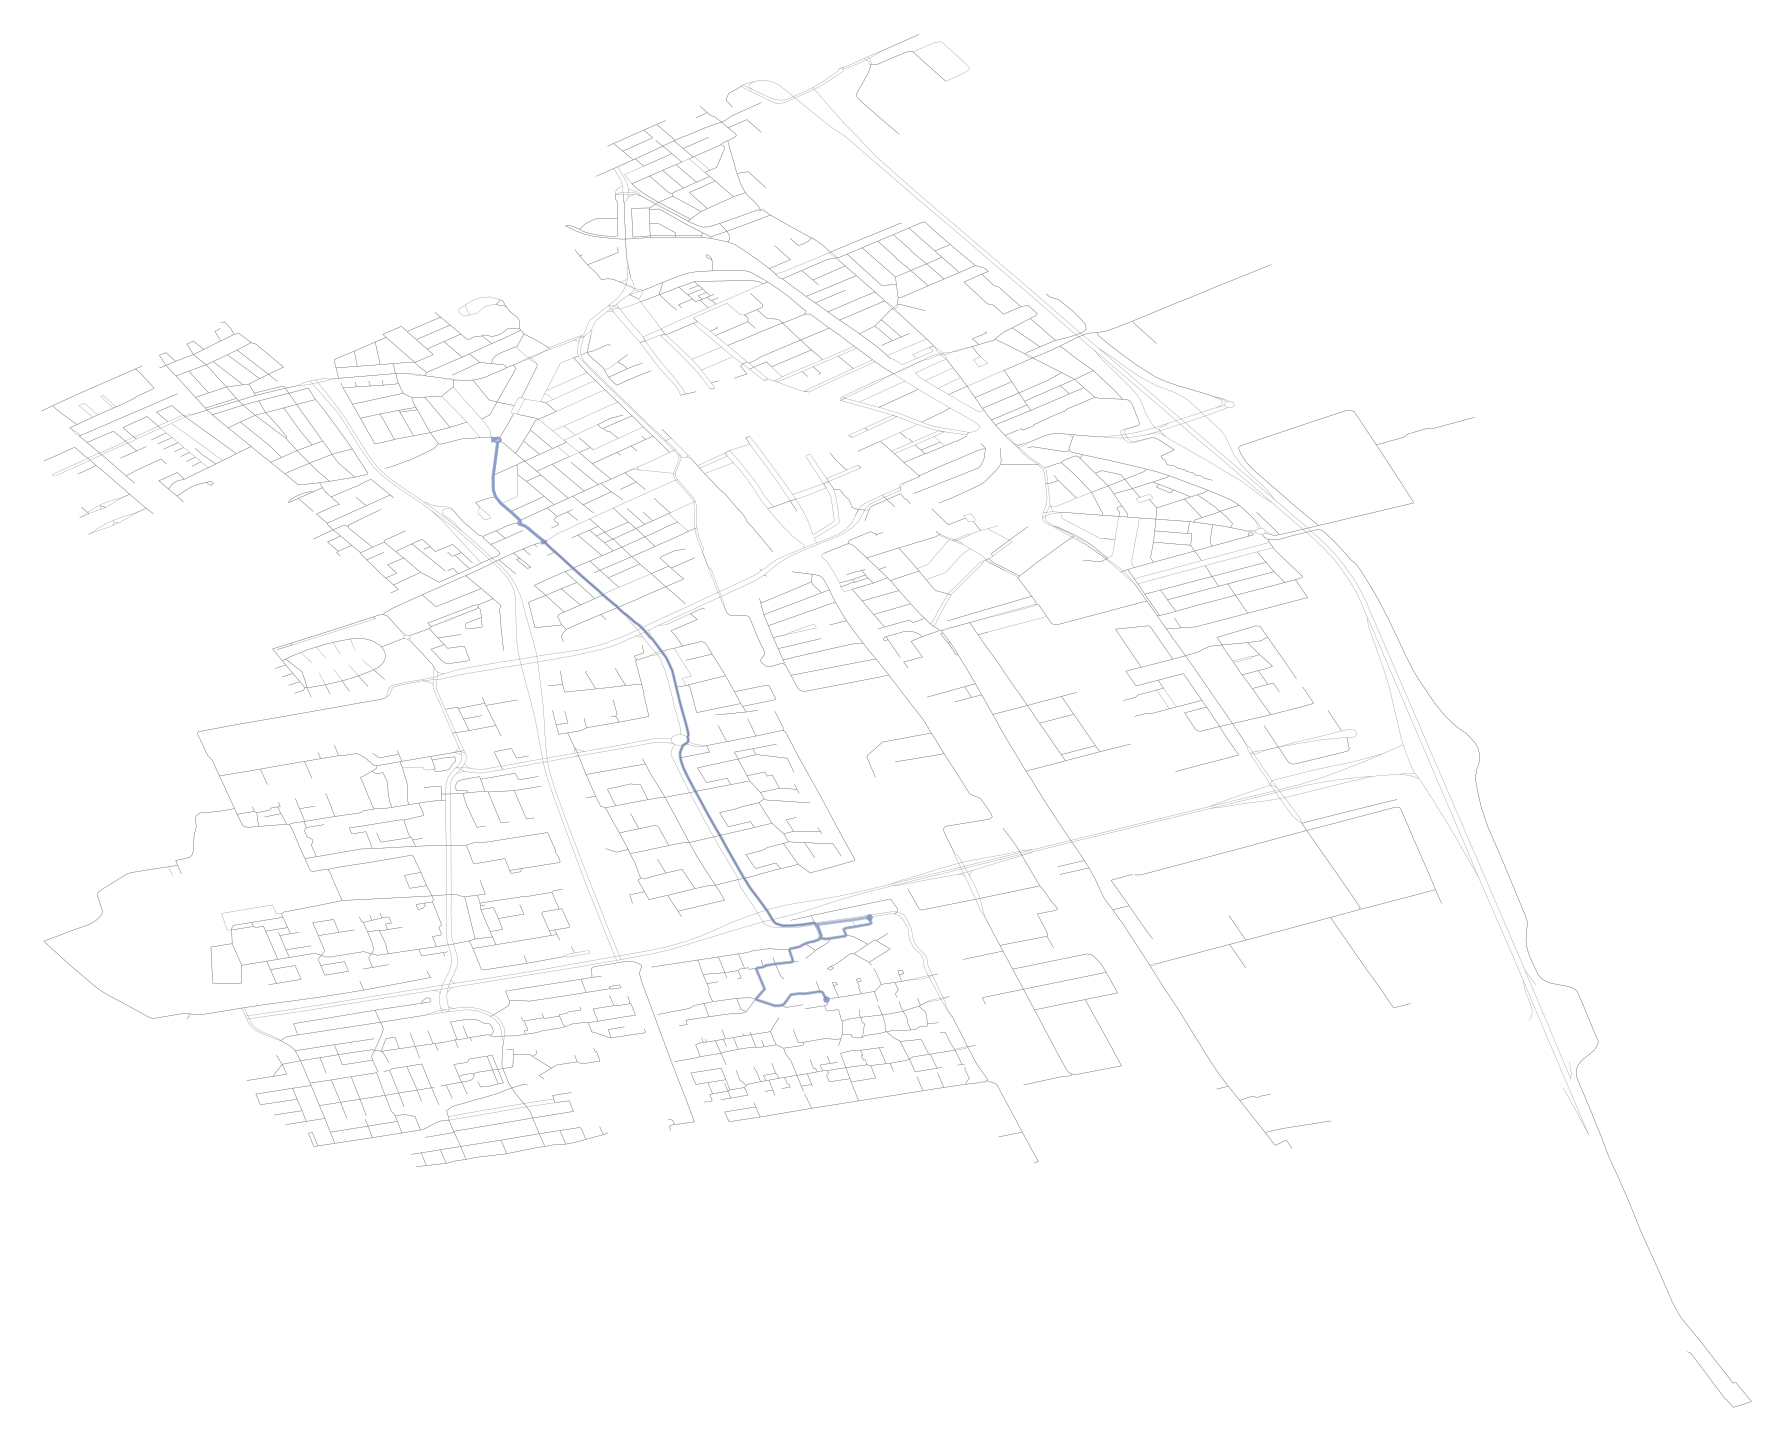

In [43]:
plot_map_rides(inData,[20])